<a href="https://colab.research.google.com/github/RogerPannah/Data-science-Portfolio/blob/main/E_News_Express_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


Business Context

E-news has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

## Define Problem Statement and Objectives

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. You have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2.  Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Python Course/abtest.csv')

## Exploring the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#checking the first few rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#view the last 5 of data
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#checking the shape of the data
df.shape


(100, 6)

In [ ]:
#checking the data column and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
#getting the statistic summery of variables
df.describe().T


,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [ ]:
#checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

###There are no missing values

In [ ]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

###There are nmo duplicates in the dataset

### Univariate Analysis

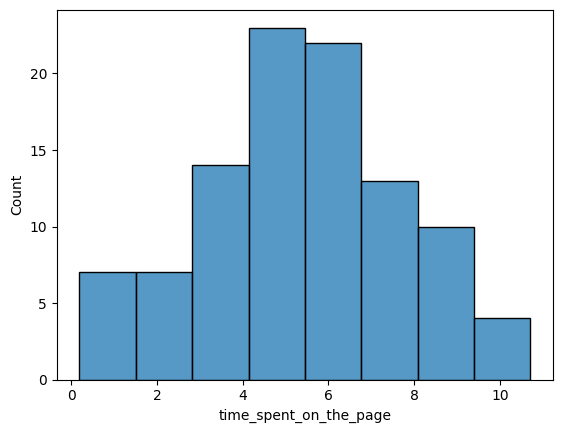

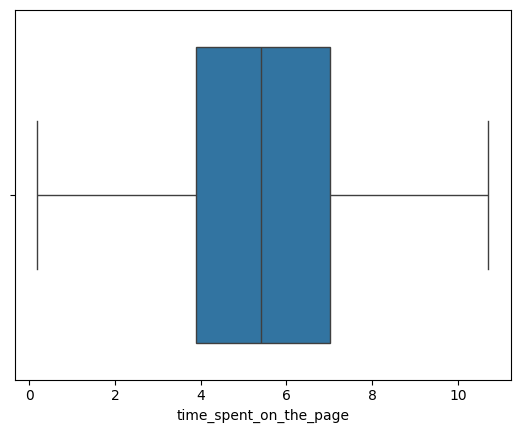

In [ ]:
#Time spent is a univariate analysis
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

###From the histplots time spent has bell shape curve

In [ ]:
#Landing page is a univariate analysis
df['landing_page'].value_counts()



landing_page
old    50
new    50
Name: count, dtype: int64

###the old landing page has 50 and the new one has also 50

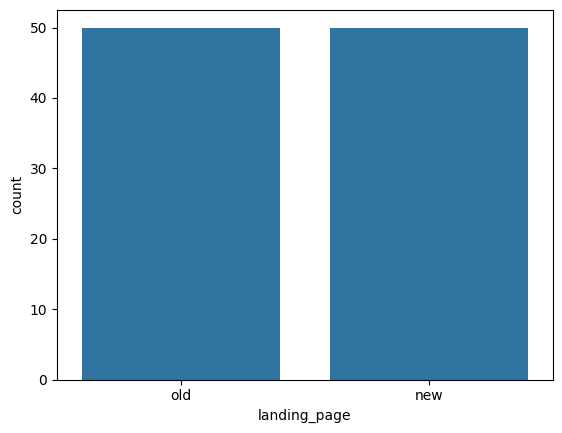

In [ ]:
sns.countplot(data=df,x='landing_page')
plt.show()

In [ ]:
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

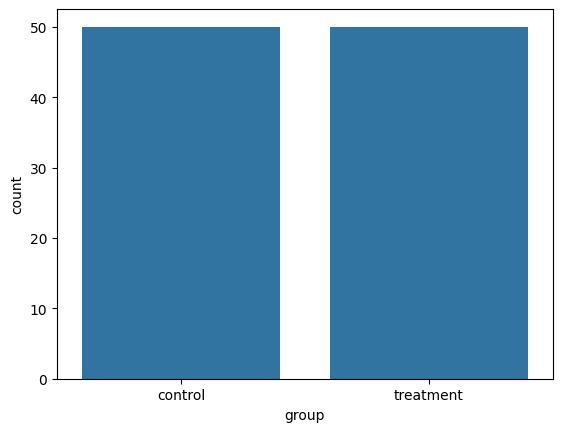

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

In [ ]:
#Language preferred
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

###There 34 Spanish, 34 French, English language preferred

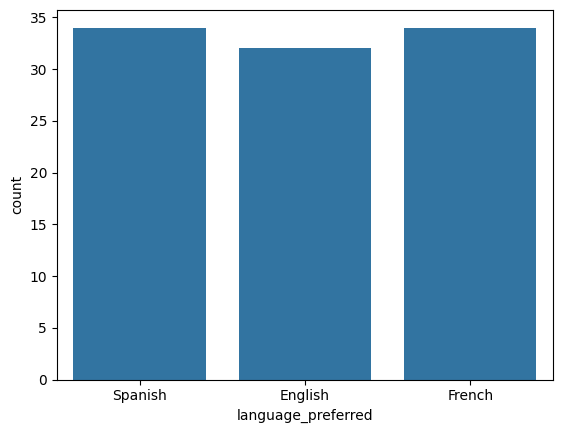

In [ ]:
sns.countplot(data=df,x='language_preferred')
plt.show()

In [ ]:
#Converted
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

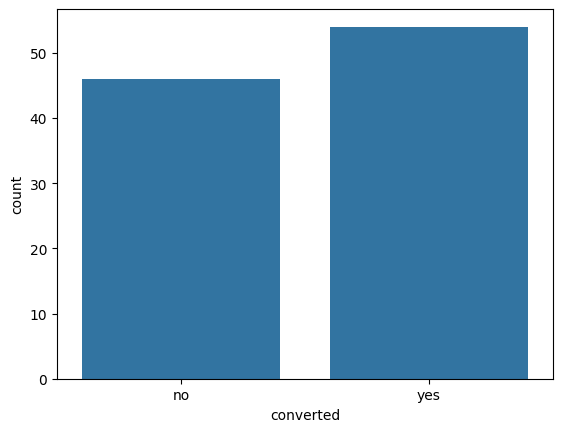

In [ ]:
sns.countplot(data=df,x='converted')
plt.show()

### Bivariate Analysis

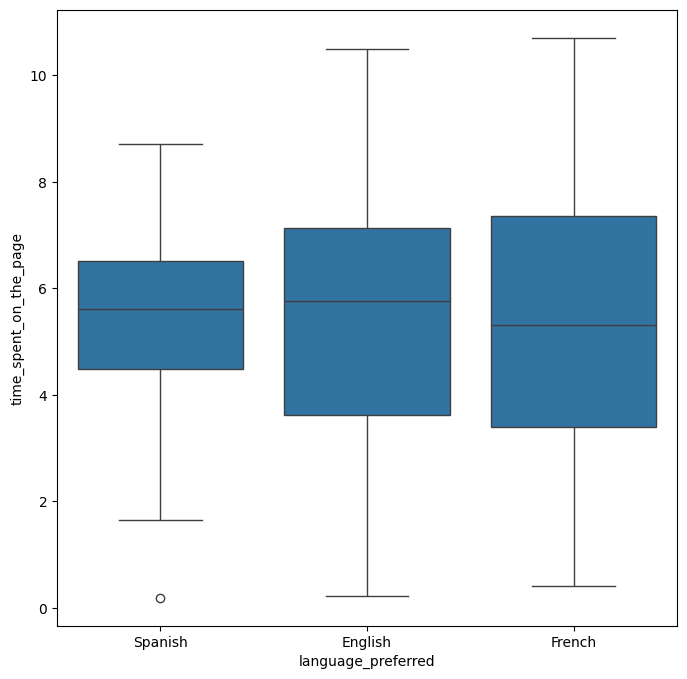

In [ ]:
#Language preferred and Time spent on the page
plt.figure(figsize=(8, 8))
sns.boxplot(data = df, x ='language_preferred', y = 'time_spent_on_the_page')
plt.show()

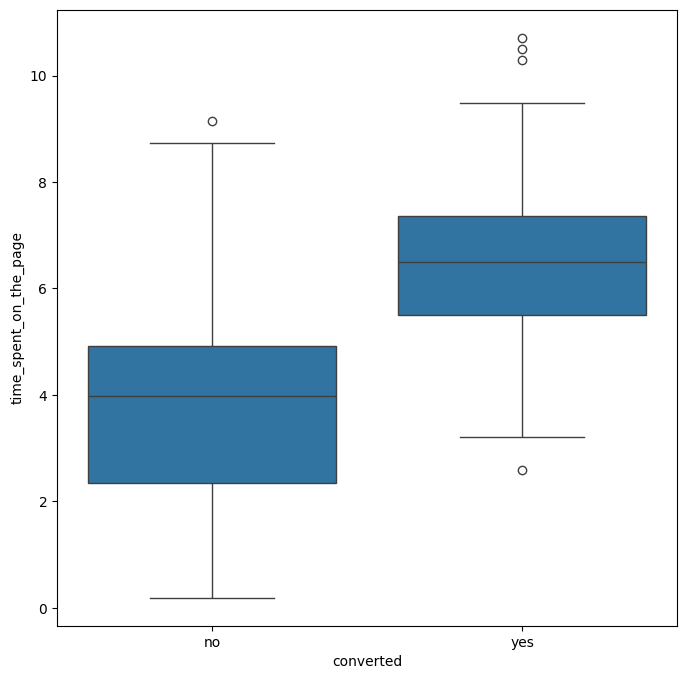

In [ ]:
#Conversion status and Time spent on the page
plt.figure(figsize=(8, 8))
sns.boxplot(data = df, x = 'converted', y ='time_spent_on_the_page')
plt.show()

###There more outliers in yes than no

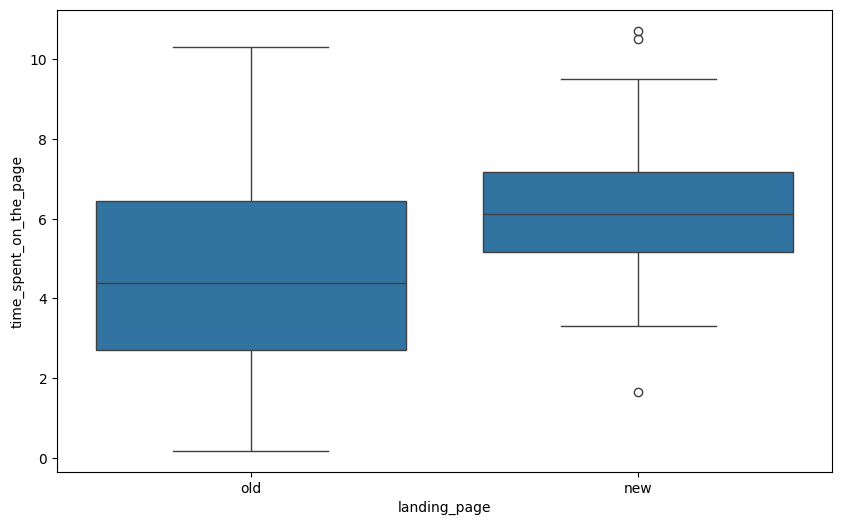

In [ ]:
#Landing page and Time spent on the page
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

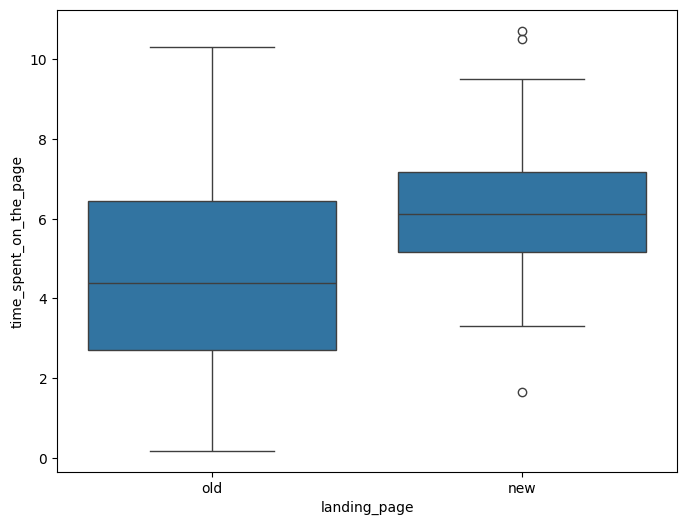

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

###Looking at the boxplots users spend more time on the new landing page than the old

### Step 1: Define the null and alternate hypotheses


H0:μ1=μ2

against the alternate hypothesis

Ha:μ1>μ2

### Step 2: Select Appropriate test

Because the standard deviation is unkwnown the appropraite test to use is 2 sample t-test. And the test is one-tailed test

### Step 3: Decide the significance level

significant level is 0.05

### Step 4: Collect and prepare data

In [ ]:
#  data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

#calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

P value is less than significant level , it means users do not spend more time on the new landing page than the old landing page

> Add blockquote



**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

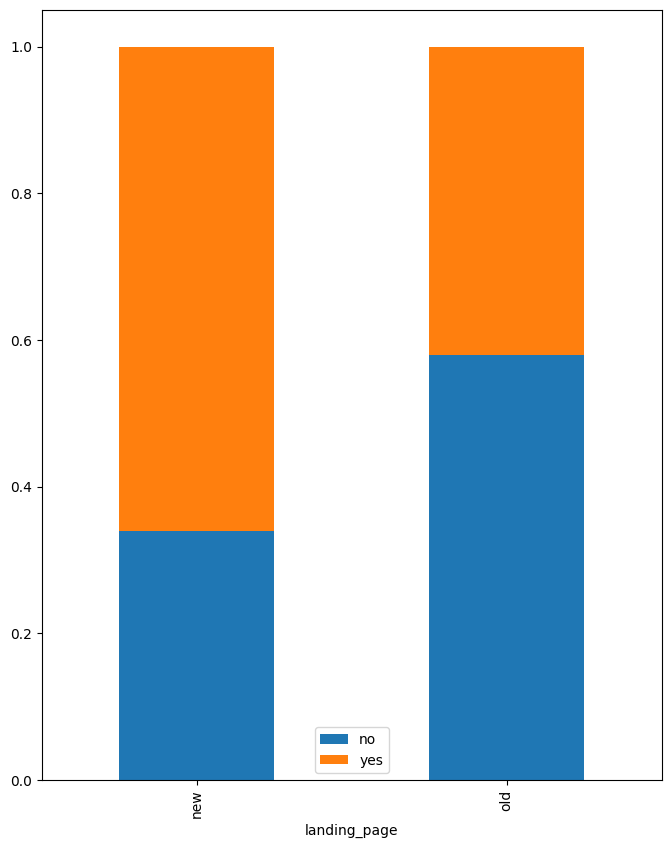

In [ ]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(8,10),stacked=True)
plt.legend()
plt.show()

Defining the null and alternative hypothesis

Let  p1,p2  be the proportions of conversion rate for new and old landing page respectively.


H0:p1>= p2

against the alternate hypothesis

Ha:p1<p2

###This is a one-tailed test for two population proportions from two independent populations.
Two proportion z-test will be used

### level of significant is 0.05

##Preparing the data

In [ ]:
# calculating the  users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculating the users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control']
n_treatment = df.group.value_counts()['treatment']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))


The numbers of users served the new and old pages are 50 and 50 respectively


##P-value calculating


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

#calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')


print('The p-value is', p_value)

The p-value is 0.008026308204056278


##Comparing p_value with level of significant

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


Base on the p-value we can conclude that conversion rate for the new landing page is not greater than that of old landing page.

## 3. Is the conversion and preferred language are independent or related?

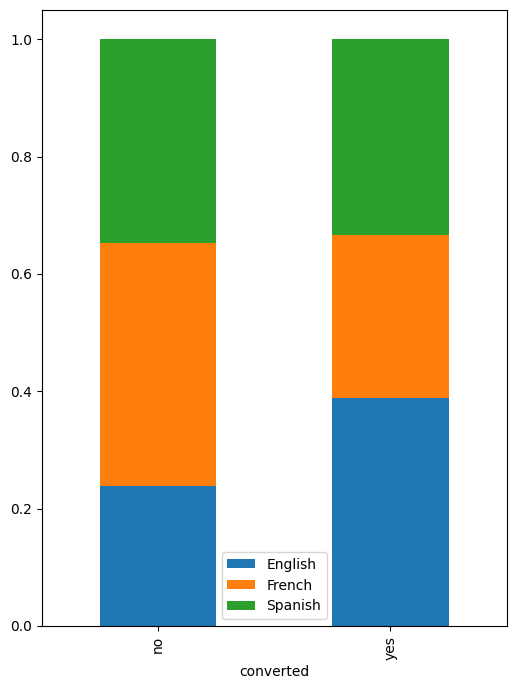

In [ ]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


##Null and alternative hypothesis

We will test the null hypothesis

H0: conversion is independence of preferred language.

against the alternate hypothesis

Ha:  conversion is not indpendence of preferred language

##Selecting the appropriate test

A chi-square of independence will be used because there two independence categorical variables being compared

##level of significant for this test is 0.05

##Preparing data

In [ ]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])

contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


calculating the p-value


In [ ]:
from scipy.stats import chi2_contingency

#calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


Comparing p-value with level of significant


In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


From the test we reject the null hypothesis that means conversion rate and preferred laguage are related.

## 4. Is the time spent on the new page same for the different language users?

In [ ]:
#creating a new data frame for the servers on the new page
df_new = df[df['landing_page'] == 'new']

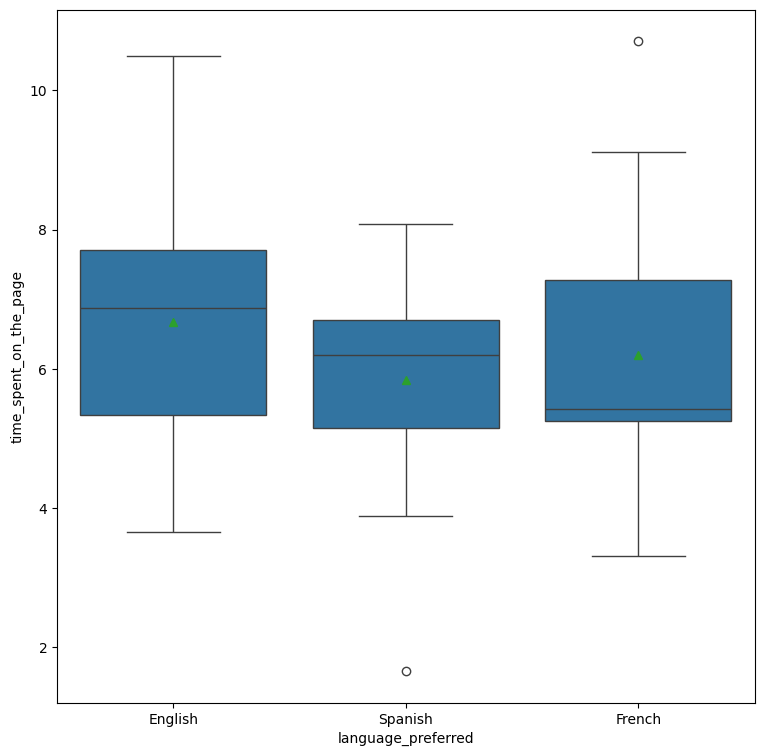

In [ ]:
plt.figure(figsize=(9,9))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


Looking at the boxplot, English speakers spent more time on the new page

Null and alternative Hypothesis

H0:μ1=μ2=μ3

against the alternative hypothesis

Ha:  at least one mean will not be the same.

##More than two means are being compared here so one-way ANOVA test will be used

##Level of significant is 0.05

#Preparing data

In [ ]:
#time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
#time spent on the new page by French language users
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']
##time spent on the new page by French language users
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']

#Calculate the p-value

In [ ]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


#comparing p-value to level of significant

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## We fail to reject the null hypothesis so it means the means of all 3 languages are the same

## Conclusion and Business Recommendations

##Key Recommendations:


*   Implement the new landing page to increase overall user engagement and conversations.
*   Develop targeted strategies for non-English speaking users to improve their experience and engagement.
        
*  Develop targeted strategies for non-English speaking users to improve their experience and engagement.

*  Create personalized content for language-specific user groups to enhance satisfaction and conversions further.
        
* Monitor and evaluate the performance of the new landing page continuously to ensure sustained results.
        
* Conduct A/B testing for other design elements, such as call-to-action placement and visual features, to optimize user interaction further.
        
* Improve the onboarding process for first-time users to boost early engagement and retention.



___